Dates Analyzed: The Special Election for US House 11 in Alabama was called on Febuary 17th. This analysis was first performed on 
April 6th. Datasets were pulled from Alabama FCPA by searching the candidates names in the contribution search tool and pulling 
data that was available from Febuary 17th - April 6th. 

In [1]:
#imports needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# python environment
# python==3.12.0
# matplotlib == 3.8.3
# numpy == 1.26.4
!conda list

# packages in environment at C:\Users\Corey\anaconda3\envs\panalysis:
#
# Name                    Version                   Build  Channel
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0                    pypi_0    pypi
bzip2                     1.0.8                h2bbff1b_5  
ca-certificates           2024.3.11            haa95532_0  
certifi                   2024.2.2                 pypi_0    pypi
cffi           

In [3]:
#getting the data for analysis 
cwd = os.getcwd()
datadir = os.path.join(cwd, 'data')

In [4]:
!cd ./data && dir

 Volume in drive C has no label.
 Volume Serial Number is 9A74-9FD8

 Directory of C:\Users\Corey\Dev\AL_campaign_finance_analysis\AL_House_11\data

04/06/2025  02:31 PM    <DIR>          .
04/06/2025  02:31 PM    <DIR>          ..
04/06/2025  02:24 PM            14,390 allbright.csv
04/06/2025  02:21 PM             1,732 braswell.csv
04/06/2025  02:57 PM    <DIR>          cleandata
04/06/2025  02:25 PM            10,328 falin.csv
               3 File(s)         26,450 bytes
               3 Dir(s)  104,329,342,976 bytes free


In [5]:
#setting the path for the candidates 
allbright = os.path.join(datadir, "allbright.csv")
braswell = os.path.join(datadir, "braswell.csv")
fallin = os.path.join(datadir, "falin.csv")

In [6]:
#load the data for the candidates
braswelldf = pd.read_csv(braswell)
allbrightdf = pd.read_csv(allbright)
fallindf = pd.read_csv(fallin)

In [7]:
braswelldf #looking at both datasets to see whats inside

FilingDate               Contributor         CityState  ZipCode  \
0  4/2/2025 9:03:45 PM          MRS. JEAN BRIGHT       CULLMAN, AL  35057.0   
1  4/2/2025 9:03:45 PM  MR. RICHARD BROWNING JR.       CULLMAN, AL  35055.0   
2  4/2/2025 9:03:45 PM            SUSAN MCKENNEY  GUNTERSVILLE, AL  35976.0   
3  4/2/2025 9:03:45 PM            WHITNEY CARDEN       CULLMAN, AL  35055.0   
4  4/2/2025 9:03:45 PM                LEIGH LYNN  BLOUNTSVILLE, AL  35031.0   
5  4/2/2025 9:03:45 PM       ALEXANDRIA BRASWELL       CULLMAN, AL  35058.0   
6  4/2/2025 9:03:45 PM           MISS JUDY BROWN    CRANE HILL, AL  35053.0   
7  4/2/2025 9:03:45 PM                       NaN               NaN      NaN   

  ContributorType   Amount       ContributionDate     ContributionType  \
0      Individual   250.00  3/10/2025 12:00:00 AM      Cash (Itemized)   
1      Individual   250.00  3/13/2025 12:00:00 AM      Cash (Itemized)   
2      Individual   100.00  3/20/2025 12:00:00 AM      Cash (Itemized)   
3      Individual   100.00  3/21/2025 12:00:00 AM      Cash (Itemized)   
4      Individual   100.00  3/21/2025 12:00:00 AM      Cash (Itemized)   
5      Individual   800.00  3/27/2025 12:00:00 AM                 Loan   
6      Individual   100.00  3/31/2025 12:00:00 AM      Cash (Itemized)   
7             NaN  2218.98  3/31/2025 12:00:00 AM  Cash (Non-Itemized)   

   Description        RecipientName  ContributionID  RecipeintOrgID  \
0          NaN  ALEXANDRIA BRASWELL         1214127           31416   
1          NaN  ALEXANDRIA BRASWELL         1214129           31416   
2          NaN  ALEXANDRIA BRASWELL         1214133           31416   
3          NaN  ALEXANDRIA BRASWELL         1214130           31416   
4          NaN  ALEXANDRIA BRASWELL         1214131           31416   
5          NaN  ALEXANDRIA BRASWELL         1214150           31416   
6          NaN  ALEXANDRIA BRASWELL         1214128           31416   
7          NaN  ALEXANDRIA BRASWELL         1214142           31416   

   ContSeqID  MAXROWS  RecordCount  
0     918797    20000            8  
1     918799    20000            8  
2     918802    20000            8  
3     918800    20000            8  
4     918801    20000            8  
5     918804    20000            8  
6     918798    20000            8  
7     918803    20000            8

In [8]:
allbrightdf

FilingDate                     Contributor         CityState  \
0   4/2/2025 9:34:17 PM                  EDITH C MOBLEY       CULLMAN, AL   
1   4/2/2025 9:34:17 PM                  GRADETECH, LLC  BLOUNTSVILLE, AL   
2   4/2/2025 9:34:17 PM                   WINDMILL FARM    HOLLY POND, AL   
3   4/2/2025 9:34:17 PM  ALABAMA IN-HOME ASSISTANCE LLC       CULLMAN, AL   
4   4/2/2025 9:34:17 PM          SCHWAIGER CONSTRUCTION       CULLMAN, AL   
..                  ...                             ...               ...   
65  4/2/2025 9:34:17 PM                     BROOKS LEVY       SLIDELL, LA   
66  4/2/2025 9:34:17 PM                    CHRIS ALLRED   GULF SHORES, AL   
67  4/2/2025 9:34:17 PM          WAYNE BURDEN III, INC.       CULLMAN, AL   
68  4/2/2025 9:34:17 PM                   AMANDA HELTON    HOLLY POND, AL   
69  4/2/2025 9:34:17 PM                    PROGRESS PAC    MONTGOMERY, AL   

    ZipCode             ContributorType  Amount       ContributionDate  \
0     35055                  Individual  1000.0   3/3/2025 12:00:00 AM   
1     35019  Group/Business/Corporation  1000.0   3/3/2025 12:00:00 AM   
2     35083  Group/Business/Corporation  2000.0   3/3/2025 12:00:00 AM   
3     35055  Group/Business/Corporation  5000.0   3/3/2025 12:00:00 AM   
4     35057  Group/Business/Corporation   500.0   3/3/2025 12:00:00 AM   
..      ...                         ...     ...                    ...   
65    70460                  Individual   100.0  3/27/2025 12:00:00 AM   
66    36547                  Individual   100.0  3/27/2025 12:00:00 AM   
67    35058  Group/Business/Corporation   500.0  3/31/2025 12:00:00 AM   
68    35055                  Individual    50.0  3/31/2025 12:00:00 AM   
69    36102                         PAC  7500.0  3/31/2025 12:00:00 AM   

   ContributionType  Description            RecipientName  ContributionID  \
0   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210289   
1   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210302   
2   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210304   
3   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210305   
4   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1213927   
..              ...          ...                      ...             ...   
65  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214180   
66  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214181   
67  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214056   
68  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214179   
69  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214215   

    RecipeintOrgID  ContSeqID  MAXROWS  RecordCount  
0            31417     918815    20000           70  
1            31417     918827    20000           70  
2            31417     918828    20000           70  
3            31417     918829    20000           70  
4            31417     918834    20000           70  
..             ...        ...      ...          ...  
65           31417     918865    20000           70  
66           31417     918866    20000           70  
67           31417     918837    20000           70  
68           31417     918864    20000           70  
69           31417     918879    20000           70  

[70 rows x 15 columns]

In [9]:
fallindf

FilingDate                 Contributor              CityState  \
0   4/2/2025 5:09:04 PM               DONALD FALLIN            CULLMAN, AL   
1   4/2/2025 5:09:04 PM               DONALD FALLIN            CULLMAN, AL   
2   4/2/2025 5:09:04 PM             KENNETH BRADLEY        BAY MINETTE, AL   
3   4/2/2025 5:09:04 PM           CHARLES KIPLINGER        UNION GROVE, AL   
4   4/2/2025 5:09:04 PM               DONALD FALLIN            CULLMAN, AL   
5   4/2/2025 5:09:04 PM            KENNETH PHILLIPS         CRANE HILL, AL   
6   4/2/2025 5:09:04 PM                 RONALD APEL           VINEMONT, AL   
7   4/2/2025 5:09:04 PM                JOHN A RILEY            CULLMAN, AL   
8   4/2/2025 5:09:04 PM      SHOP AROUND THE CORNER            CULLMAN, AL   
9   4/2/2025 5:09:04 PM              PAM WILLINGHAM            CULLMAN, AL   
10  4/2/2025 5:09:04 PM             KENNETH N BROWN            CULLMAN, AL   
11  4/2/2025 5:09:04 PM                  NOAH GUDEL             BREMEN, AL   
12  4/2/2025 5:09:04 PM                 ROBERT HAIN            CULLMAN, AL   
13  4/2/2025 5:09:04 PM              ORVILLE J REID         PORT HURON, MI   
14  4/2/2025 5:09:04 PM              ROBERT C BURNS            CULLMAN, AL   
15  4/2/2025 5:09:04 PM            JONATHAN B GREEN            CULLMAN, AL   
16  4/2/2025 5:09:04 PM          CLARENCE BENEFIELD            CULLMAN, AL   
17  4/2/2025 5:09:04 PM              GARRY MARCHMAN           VINEMONT, AL   
18  4/2/2025 5:09:04 PM                  TOM BARNES            CULLMAN, AL   
19  4/2/2025 5:09:04 PM              DAVID BENJAMIN  OWENS CROSS ROADS, AL   
20  4/2/2025 5:09:04 PM               GAVIN HEMBREE            CULLMAN, AL   
21  4/2/2025 5:09:04 PM                  DAVID FORD            MADISON, AL   
22  4/2/2025 5:09:04 PM             JENNIFER HANSEN             RUSTON, LA   
23  4/2/2025 5:09:04 PM              MATTHEW HANSEN          MANHATTAN, KS   
24  4/2/2025 5:09:04 PM               PATRICK DAVIS             GURLEY, AL   
25  4/2/2025 5:09:04 PM            TIMOTHY MITCHELL     HIGHLAND MILLS, NY   
26  4/2/2025 5:09:04 PM             ROBERT ARMFIELD          NICEVILLE, FL   
27  4/2/2025 5:09:04 PM                 JOSH HARDIN     VESTAVIA HILLS, AL   
28  4/2/2025 5:09:04 PM              TRENT MCLEMORE         HUNTSVILLE, AL   
29  4/2/2025 5:09:04 PM           ROBERT EISIMINGER    FAIRFAX STATION, VA   
30  4/2/2025 5:09:04 PM                   RON WOOOD           VINEMONT, AL   
31  4/2/2025 5:09:04 PM             STEPHEN INGALLS            LANSING, KS   
32  4/2/2025 5:09:04 PM           CHARLES KIPLINGER        UNION GROVE, AL   
33  4/2/2025 5:09:04 PM               DAVID QUIGLEY           TRUMBULL, CT   
34  4/2/2025 5:09:04 PM             RANDY C JOHNSON            CULLMAN, AL   
35  4/2/2025 5:09:04 PM             WILLIAM M TRUST              MILAN, NY   
36  4/2/2025 5:09:04 PM             KENNETH N BROWN            CULLMAN, AL   
37  4/2/2025 5:09:04 PM    DIAMOND PLAZA PROPERTIES           VINEMONT, AL   
38  4/2/2025 5:09:04 PM                  BILL FLOYD            CULLMAN, AL   
39  4/2/2025 5:09:04 PM                 BOBBY ROCHA            OPELIKA, AL   
40  4/2/2025 5:09:04 PM                 MEL JENKINS       FAYETTEVILLE, NC   
41  4/2/2025 5:09:04 PM                 PAUL BOLGER           ELMHURST, AL   
42  4/2/2025 5:09:04 PM                WAYNE WALKER            CULLMAN, AL   
43  4/2/2025 5:09:04 PM              CATHI BRADFORD         HANCEVILLE, AL   
44  4/2/2025 5:09:04 PM              WILEY KITCHENS           VINEMONT, AL   
45  4/2/2025 5:09:04 PM              ROBIN CUMMINGS            CULLMAN, AL   
46  4/2/2025 5:09:04 PM  CARL HASTINGS CONSTRUCTION         HANCEVILLE, AL   
47  4/2/2025 5:09:04 PM    ALABAMA COAL COOPERATIVE            CULLMAN, AL   
48  4/2/2025 5:09:04 PM               JEREMY BARLOW            CULLMAN, AL   
49  4/2/2025 5:09:04 PM               DAVID DIMMOCK            CULLMAN, AL   
50  4/2/2025 5:09:04 PM            

In [10]:
#lets clean up the dataframe to get only the contributions where miller and ross are reciving the money, just to make sure there is no other candidate
fallindf[fallindf['RecipientName'] == 'DONALD GENE FALLIN']['Amount'].sum()

50130.0

In [11]:
allbrightdf[allbrightdf['RecipientName'] == 'MICHAEL HEATH ALLBRIGHT']['Amount'].sum()

71468.48

In [12]:
braswelldf[braswelldf['RecipientName'] == 'ALEXANDRIA BRASWELL']['Amount'].sum()

3918.98

In [13]:
# cleaning the data to just get the datafame that has Jeana and Alan without any other people 
allbrightdf = allbrightdf[allbrightdf['RecipientName'] == 'MICHAEL HEATH ALLBRIGHT']
braswelldf = braswelldf[braswelldf['RecipientName'] == 'ALEXANDRIA BRASWELL']
fallindf = fallindf[fallindf['RecipientName'] == 'DONALD GENE FALLIN']

In [14]:
# what are the unique contributor types? 
allbrightdf['ContributorType'].unique() #the types of contributions

array(['Individual', 'Group/Business/Corporation', 'PAC'], dtype=object)

In [15]:
fallindf['ContributorType'].unique()

array(['Individual', 'Group/Business/Corporation', 'PAC'], dtype=object)

In [16]:
braswelldf['ContributorType'].unique()

array(['Individual', nan], dtype=object)

In [17]:
#lets ask the question, what PACS contributed to each campaign and how much as of today's analysis?
pacallbright = allbrightdf[allbrightdf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [18]:
pacfallin = fallindf[fallindf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [19]:
pacbraswell = braswelldf[braswelldf['ContributorType'] == 'PAC'].sort_values(by='Amount', ascending=False)

In [20]:
pacallbright

FilingDate                                       Contributor  \
69  4/2/2025 9:34:17 PM                                      PROGRESS PAC   
14  4/2/2025 9:34:17 PM           ALA FORESTRY POLITICAL ACTION COMMITTEE   
27  4/2/2025 9:34:17 PM                        ALABAMA HOUSE MAJORITY PAC   
20  4/2/2025 9:34:17 PM                                          SV&B PAC   
18  4/2/2025 9:34:17 PM                                             BIPAC   
7   4/2/2025 9:34:17 PM                AMERICAN PHARMACY COOPERATION INC.   
19  4/2/2025 9:34:17 PM                                          SV&B PAC   
13  4/2/2025 9:34:17 PM                                  FAIRNESS PAC INC   
17  4/2/2025 9:34:17 PM                  ALABAMA PHARMACY ASSOCIATION PAC   
12  4/2/2025 9:34:17 PM  PETROLEUM & CONVENIENCE MARKETERS OF ALABAMA PAC   
8   4/2/2025 9:34:17 PM                          RETAILERS OF ALABAMA PAC   
11  4/2/2025 9:34:17 PM                                          AUTO PAC   
22  4/2/2025 9:34:17 PM                                         DEGCO PAC   
26  4/2/2025 9:34:17 PM              ALABAMA GROCERS ASSOCIATION SACK PAC   
38  4/2/2025 9:34:17 PM                       ADAMS AND REESE ALABAMA PAC   
60  4/2/2025 9:34:17 PM                                          ROAD PAC   
24  4/2/2025 9:34:17 PM                               ALABAMA LENDERS PAC   
9   4/2/2025 9:34:17 PM                                       VICTORY PAC   

         CityState  ZipCode ContributorType  Amount       ContributionDate  \
69  MONTGOMERY, AL    36102             PAC  7500.0  3/31/2025 12:00:00 AM   
14  MONTGOMERY, AL    36104             PAC  5000.0   3/5/2025 12:00:00 AM   
27  RAINSVILLE, AL    35986             PAC  5000.0   3/7/2025 12:00:00 AM   
20  MONTGOMERY, AL    36104             PAC  5000.0   3/5/2025 12:00:00 AM   
18  MONTGOMERY, AL    36101             PAC  2500.0   3/5/2025 12:00:00 AM   
7     BESSEMER, AL    35021             PAC  2500.0   3/4/2025 12:00:00 AM   
19  MONTGOMERY, AL    36104             PAC  2500.0   3/5/2025 12:00:00 AM   
13  MONTGOMERY, AL    36012             PAC  1000.0   3/4/2025 12:00:00 AM   
17  MONTGOMERY, AL    36106             PAC  1000.0   3/5/2025 12:00:00 AM   
12  MONTGOMERY, AL    36123             PAC  1000.0   3/4/2025 12:00:00 AM   
8   MONTGOMERY, AL    36117             PAC  1000.0   3/4/2025 12:00:00 AM   
11  MONTGOMERY, AL    36106             PAC  1000.0   3/4/2025 12:00:00 AM   
22  MONTGOMERY, AL    36104             PAC  1000.0   3/5/2025 12:00:00 AM   
26  BIRMINGHAM, AL    35216             PAC  1000.0   3/6/2025 12:00:00 AM   
38      MOBILE, AL    36602             PAC  1000.0  3/11/2025 12:00:00 AM   
60  MONTGOMERY, AL    36104             PAC  1000.0  3/20/2025 12:00:00 AM   
24      PELHAM, AL    35124             PAC   500.0   3/5/2025 12:00:00 AM   
9   MONTGOMERY, AL    36106             PAC   350.0   3/4/2025 12:00:00 AM   

   ContributionType  Description            RecipientName  ContributionID  \
69  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214215   
14  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210298   
27  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1209869   
20  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214165   
18  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214162   
7   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214154   
19  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214163   
13  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214174   
17  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214159   
12  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214173   
8   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214155   
11  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214160   
22  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT        

In [21]:
pacfallin

FilingDate       Contributor       CityState  ZipCode  \
51  4/2/2025 5:09:04 PM  ALABAMA VETERANS  MONTGOMERY, AL    36117   

   ContributorType  Amount       ContributionDate ContributionType  \
51             PAC  4000.0  3/31/2025 12:00:00 AM  Cash (Itemized)   

    Description       RecipientName  ContributionID  RecipeintOrgID  \
51          NaN  DONALD GENE FALLIN         1213130           31426   

    ContSeqID  MAXROWS  RecordCount  
51     918467    20000           52

In [22]:
pacbraswell

Empty DataFrame
Columns: [FilingDate, Contributor, CityState, ZipCode, ContributorType, Amount, ContributionDate, ContributionType, Description, RecipientName, ContributionID, RecipeintOrgID, ContSeqID, MAXROWS, RecordCount]
Index: []

In [23]:
allbrightdf.to_csv("data/cleandata/Heath_Allbright_Contributions.csv")
braswelldf.to_csv("data/cleandata/Alexandria_Braswell_Contributions.csv")
fallindf.to_csv("data/cleandata/Donald_Falin_Contributions.csv")

In [24]:
#lets plot contributions by Pac and City/State
groupedallbright = pacallbright.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [25]:
pd.set_option('display.max_colwidth', None)
groupedallbright[['Contributor', 'CityState', 'Amount']].reset_index(drop='index')

Contributor       CityState  Amount
0                                           SV&B PAC  MONTGOMERY, AL  7500.0
1                                       PROGRESS PAC  MONTGOMERY, AL  7500.0
2                         ALABAMA HOUSE MAJORITY PAC  RAINSVILLE, AL  5000.0
3            ALA FORESTRY POLITICAL ACTION COMMITTEE  MONTGOMERY, AL  5000.0
4                                              BIPAC  MONTGOMERY, AL  2500.0
5                 AMERICAN PHARMACY COOPERATION INC.    BESSEMER, AL  2500.0
6                                   FAIRNESS PAC INC  MONTGOMERY, AL  1000.0
7                                           ROAD PAC  MONTGOMERY, AL  1000.0
8                           RETAILERS OF ALABAMA PAC  MONTGOMERY, AL  1000.0
9   PETROLEUM & CONVENIENCE MARKETERS OF ALABAMA PAC  MONTGOMERY, AL  1000.0
10                       ADAMS AND REESE ALABAMA PAC      MOBILE, AL  1000.0
11                                         DEGCO PAC  MONTGOMERY, AL  1000.0
12                                          AUTO PAC  MONTGOMERY, AL  1000.0
13                  ALABAMA PHARMACY ASSOCIATION PAC  MONTGOMERY, AL  1000.0
14              ALABAMA GROCERS ASSOCIATION SACK PAC  BIRMINGHAM, AL  1000.0
15                               ALABAMA LENDERS PAC      PELHAM, AL   500.0
16                                       VICTORY PAC  MONTGOMERY, AL   350.0

In [26]:
#lets plot contributions by Pac and City/State
groupedfallin = pacfallin.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)
groupedfallin[['Contributor', 'CityState', 'Amount']].reset_index(drop='index')

Contributor       CityState  Amount
0  ALABAMA VETERANS  MONTGOMERY, AL  4000.0

In [27]:
groupedbraswell = pacbraswell.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)
groupedbraswell[['Contributor', 'CityState', 'Amount']].reset_index(drop='index')

Empty DataFrame
Columns: [Contributor, CityState, Amount]
Index: []

In [28]:
#lets create a list of locations and pacnames for plotting purposes
locationsallbright= list(groupedallbright['CityState']) #where the pacs originate in order by amount
pacnameallbright = list(groupedallbright['Contributor']) #the pac name in order by amount 

In [29]:
locationsallbright #locations in order by amount of where Ross got PAC money 

['MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'RAINSVILLE, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'BESSEMER, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MOBILE, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'BIRMINGHAM, AL',
 'PELHAM, AL',
 'MONTGOMERY, AL']

In [30]:
pacnameallbright

['SV&B PAC',
 'PROGRESS PAC',
 'ALABAMA HOUSE MAJORITY PAC',
 'ALA FORESTRY POLITICAL ACTION COMMITTEE',
 'BIPAC',
 'AMERICAN PHARMACY COOPERATION INC.',
 'FAIRNESS PAC INC',
 'ROAD PAC',
 'RETAILERS OF ALABAMA PAC',
 'PETROLEUM & CONVENIENCE MARKETERS OF ALABAMA PAC',
 'ADAMS AND REESE ALABAMA PAC',
 'DEGCO PAC',
 'AUTO PAC',
 'ALABAMA PHARMACY ASSOCIATION PAC',
 'ALABAMA GROCERS ASSOCIATION SACK PAC',
 'ALABAMA LENDERS PAC',
 'VICTORY PAC']

In [31]:
color_palette = [
    "#264653",  # dark cyan-blue
    "#2a9d8f",  # teal
    "#e76f51",  # terra cotta
    "#f4a261",  # sandy orange
    "#e9c46a",  # muted yellow
    "#6a4c93",  # rich purple
    "#457b9d",  # steel blue
    "#ff6b6b",  # coral red
    "#a8dadc",  # soft aqua
    "#4ecdc4",  # tropical teal
    "#ffb627",   # amber
    "#1d3557",  # prussian blue
    "#bcbd22",  # olive
]

# Assign colors in order
colors = {}
color_index = 0


for loc in locationsallbright:
    if loc not in colors:
        # Assign the next color and loop back if needed
        colors[loc] = color_palette[color_index % len(color_palette)]
        color_index += 1

In [32]:
color_index % len(color_palette)

6

In [33]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93'}

In [34]:
color_index #increased for next set

6

In [35]:
#lets create a list of locations and pacnames for plotting purposes
locationsfallin= list(groupedfallin['CityState']) #where the pacs originate in order by amount
pacnamefallin = list(groupedfallin['Contributor']) #the pac name in order by amount 

In [36]:
locationsfallin

['MONTGOMERY, AL']

In [37]:
pacnamefallin

['ALABAMA VETERANS']

In [38]:
for loc in locationsfallin:
    if loc not in colors:
        # Assign the next color and loop back if needed
        colors[loc] = color_palette[color_index % len(color_palette)]
        color_index += 1

In [39]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93'}

In [40]:
#lets create a list of locations and pacnames for plotting purposes
locationsbraswell= list(groupedbraswell['CityState']) #where the pacs originate in order by amount
pacnamebraswell = list(groupedbraswell['Contributor']) #the pac name in order by amount 

In [41]:
locationsbraswell

[]

In [42]:
pacnamebraswell

[]

In [43]:
allbrightbarcolors = [colors.get(i) for i in locationsallbright] #creating list of colors to plot by 
braswellbarcolors = [colors.get(i) for i in locationsbraswell]
fallinbarcolors = [colors.get(i) for i in locationsfallin]

In [44]:
allbrightbarcolors

['#264653',
 '#264653',
 '#2a9d8f',
 '#264653',
 '#264653',
 '#e76f51',
 '#264653',
 '#264653',
 '#264653',
 '#264653',
 '#f4a261',
 '#264653',
 '#264653',
 '#264653',
 '#e9c46a',
 '#6a4c93',
 '#264653']

In [45]:
fallinbarcolors

['#264653']

In [46]:
braswellbarcolors

[]

In [47]:
locationsallbright

['MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'RAINSVILLE, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'BESSEMER, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MOBILE, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'BIRMINGHAM, AL',
 'PELHAM, AL',
 'MONTGOMERY, AL']

In [48]:
#creating a legend element that can be used for the plot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, edgecolor='black', label=location) for location, color in colors.items() if location in locationsallbright]

In [49]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93'}

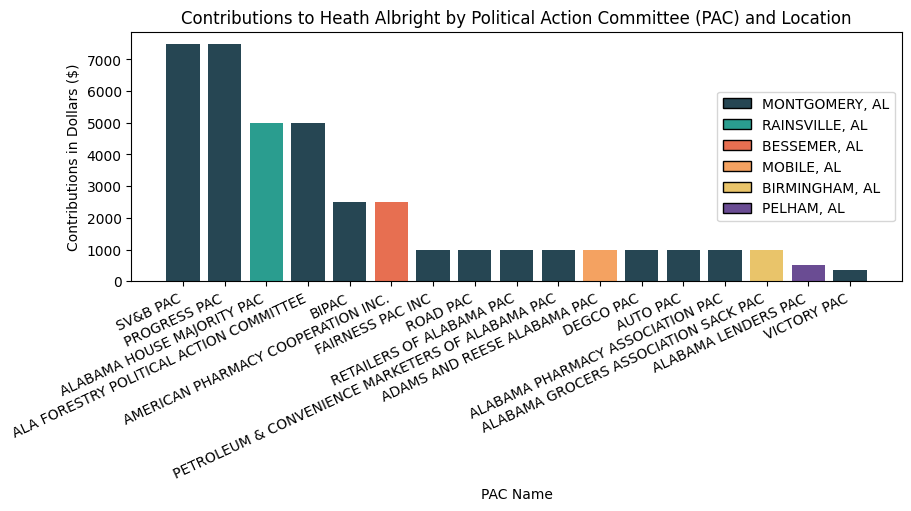

In [50]:
#plot it all
fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)
ax.bar(range(len(groupedallbright)), groupedallbright['Amount'], color=allbrightbarcolors)
ax.set_ylabel('Contributions in Dollars ($)')
ax.set_xlabel('PAC Name')
ax.set_title('Contributions to Heath Albright by Political Action Committee (PAC) and Location')
ax.set_xticks(range(len(pacnameallbright)), pacnameallbright, rotation=25, ha='right')
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.5))
fig.savefig('./figures/heath_allbright_pacs.png')
#ax[1].bar(range(len(businessmiller)), businessmiller['Amount'], color=  , rotation=90)

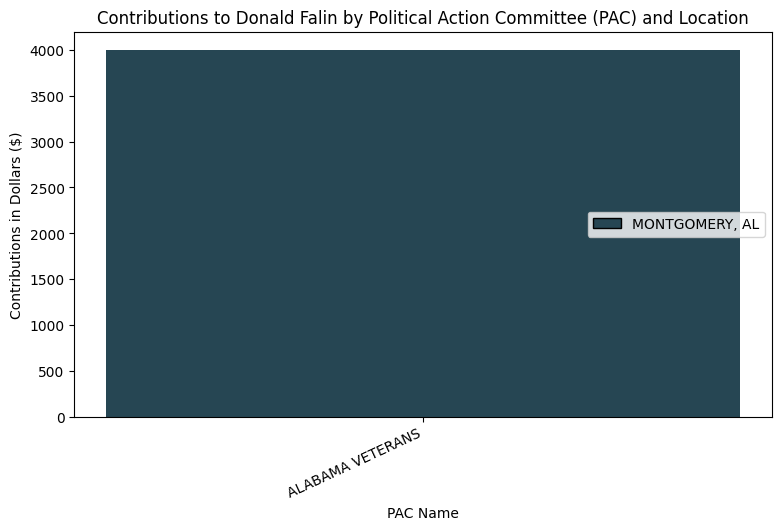

In [51]:
#plot it all
legend_elements = [Patch(facecolor=color, edgecolor='black', label=location) for location, color in colors.items() if location in locationsfallin]
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(range(len(groupedfallin)), groupedfallin['Amount'], color=fallinbarcolors)
ax.set_ylabel('Contributions in Dollars ($)')
ax.set_xlabel('PAC Name')
ax.set_title('Contributions to Donald Falin by Political Action Committee (PAC) and Location')
ax.set_xticks(range(len(pacnamefallin)), pacnamefallin, rotation=25, ha='right')
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.5))

In [52]:
#now we will plot the contributions by type
groupedallbright = allbrightdf.groupby(['ContributorType'], dropna=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [53]:
groupedallbright

ContributorType    Amount
2                         PAC  39850.00
1                  Individual  16093.48
0  Group/Business/Corporation  15525.00

In [54]:
groupedallbright['ContributorType'] = groupedallbright['ContributorType'].astype(str)

In [55]:
groupedallbright

ContributorType    Amount
2                         PAC  39850.00
1                  Individual  16093.48
0  Group/Business/Corporation  15525.00

In [56]:
groupedallbright['ContributorType'].replace('nan', 'Not Itemized', inplace=True)

C:\Users\Corey\AppData\Local\Temp\ipykernel_4692\1446463625.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  groupedallbright['ContributorType'].replace('nan', 'Not Itemized', inplace=True)


In [57]:
groupedfallin = fallindf.groupby(['ContributorType'], dropna=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [58]:
groupedfallin

ContributorType   Amount
1                  Individual  42330.0
2                         PAC   4000.0
0  Group/Business/Corporation   3800.0

In [59]:
groupedfallin

ContributorType   Amount
1                  Individual  42330.0
2                         PAC   4000.0
0  Group/Business/Corporation   3800.0

In [60]:
groupedbraswell = braswelldf.groupby(['ContributorType'], dropna=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [61]:
groupedbraswell

ContributorType   Amount
1             NaN  2218.98
0      Individual  1700.00

In [62]:
groupedbraswell['ContributorType'] = groupedbraswell['ContributorType'].astype(str)

In [63]:
groupedbraswell['ContributorType'].replace('nan', 'Not Itemized', inplace=True)

C:\Users\Corey\AppData\Local\Temp\ipykernel_4692\3830449369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  groupedbraswell['ContributorType'].replace('nan', 'Not Itemized', inplace=True)


In [64]:
#now we will add PAC donations to braswells dataframe to make the data more understandable 
# he has 0 dollars in pac contributions
groupedbraswell.loc[len(groupedbraswell.index)] = ['PAC', 0.00]

In [65]:
groupedbraswell

ContributorType   Amount
1    Not Itemized  2218.98
0      Individual  1700.00
2             PAC     0.00

In [66]:
contributorcolors = {'PAC':'Red', 'Group/Business/Corporation':'Blue', 'Individual':'Green', 'Not Itemized':'Yellow'}

In [67]:
#now sort by PAC, Individual, Business, and Not Itemized
custom_dict = {'PAC': 0, 'Individual': 1, 'Group/Business/Corporation': 3, 'Not Itemized': 4}
groupedbraswell.sort_values(by=['ContributorType'], key=lambda x: x.map(custom_dict), inplace=True)
groupedallbright.sort_values(by=['ContributorType'], key=lambda x: x.map(custom_dict), inplace=True)
groupedfallin.sort_values(by=['ContributorType'], key=lambda x: x.map(custom_dict), inplace=True)
#setting colors
braswellcolors = [contributorcolors.get(str(i)) for i in groupedbraswell['ContributorType']]
allbrightcolors = [contributorcolors.get(str(i)) for i in groupedallbright['ContributorType']]
fallincolors = [contributorcolors.get(str(i)) for i in groupedfallin['ContributorType']]
#setting contribution keys
braswellcontributions = list(groupedbraswell['ContributorType']) 
allbrightcontributions = list(groupedallbright['ContributorType'])
fallincontributions = list(groupedfallin['ContributorType'])

In [68]:
groupedbraswell

ContributorType   Amount
2             PAC     0.00
0      Individual  1700.00
1    Not Itemized  2218.98

In [69]:
groupedallbright

ContributorType    Amount
2                         PAC  39850.00
1                  Individual  16093.48
0  Group/Business/Corporation  15525.00

In [70]:
groupedfallin

ContributorType   Amount
2                         PAC   4000.0
1                  Individual  42330.0
0  Group/Business/Corporation   3800.0

C:\Users\Corey\AppData\Local\Temp\ipykernel_4692\585239059.py:43: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.8)


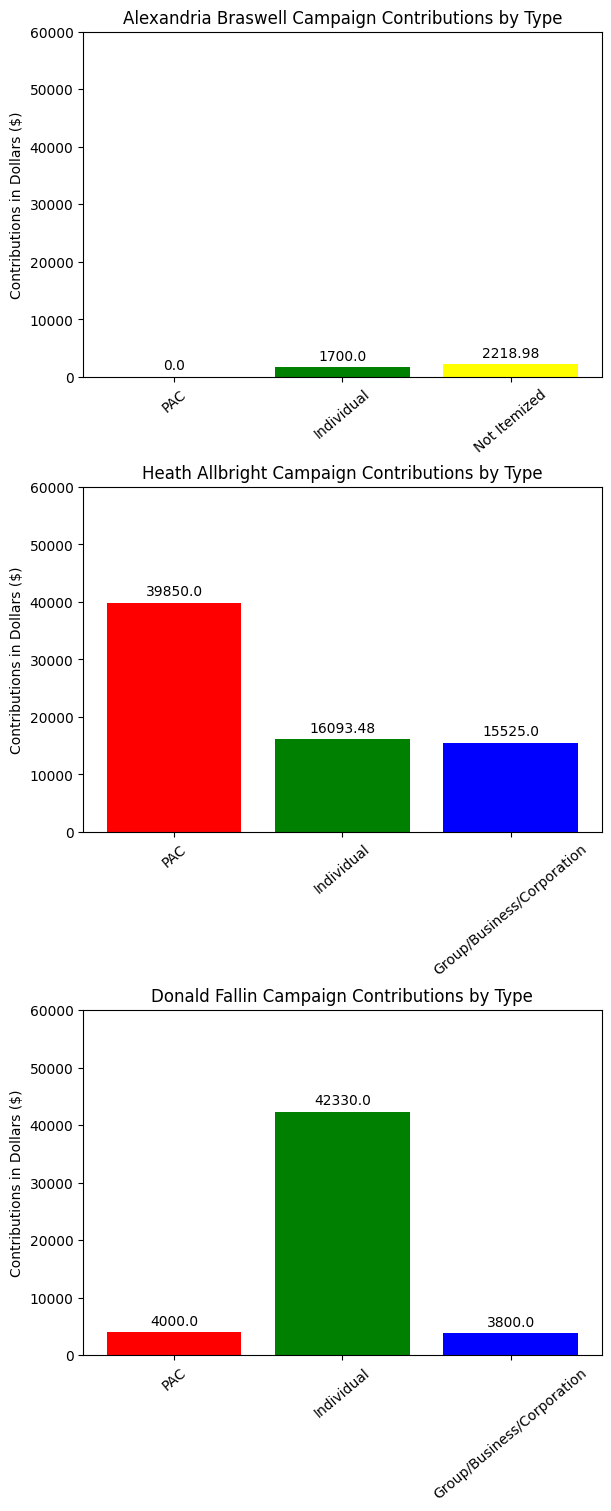

In [71]:
fig, ax = plt.subplots(figsize=(6, 5*3), nrows=3, constrained_layout=True)
braswell = ax[0].bar(groupedbraswell['ContributorType'], groupedbraswell['Amount'], color=braswellcolors)
ax[0].set_xticks(range(len(braswellcontributions)), braswellcontributions, rotation=40)
allbright = ax[1].bar(groupedallbright['ContributorType'], groupedallbright['Amount'], color=allbrightcolors)
ax[1].set_xticks(range(len(allbrightcontributions)), allbrightcontributions, rotation=40)
fallin = ax[2].bar(groupedfallin['ContributorType'], groupedfallin['Amount'], color=fallincolors)
ax[2].set_xticks(range(len(fallincontributions)), fallincontributions, rotation=40)

ax[0].set_title('Alexandria Braswell Campaign Contributions by Type')
ax[1].set_title('Heath Allbright Campaign Contributions by Type')
ax[2].set_title('Donald Fallin Campaign Contributions by Type')
ax[0].set_ylabel('Contributions in Dollars ($)')
ax[1].set_ylabel('Contributions in Dollars ($)')
ax[2].set_ylabel('Contributions in Dollars ($)')

for p in braswell:
   height = p.get_height()
   ax[0].annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

for p in allbright:
   height = p.get_height()
   ax[1].annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

for p in fallin:
   height = p.get_height()
   ax[2].annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

ax[0].set_ylim(0, 60000)
ax[1].set_ylim(0, 60000)
ax[2].set_ylim(0, 60000)
fig.subplots_adjust(hspace=0.8)
fig.savefig('./figures/campaign_contributions_by_type.png')

Looks like there were signifigant differences between the individual contributions between Alan Miller and Jeana Ross. However, it is not clear why the individual contributions were different. Lets plot by contributor and contribution type. 

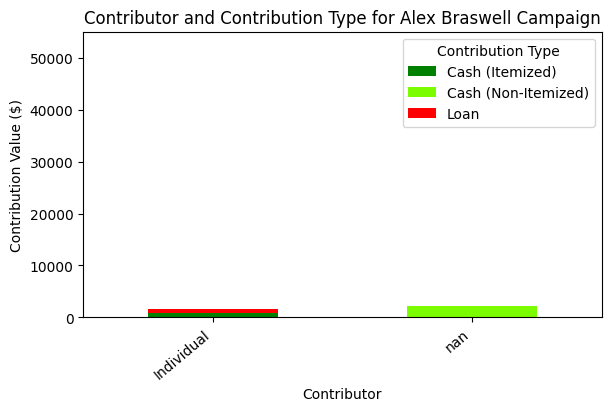

In [72]:
#now we will create summary plots for each of the campaigns that can show contributor and contributor types
fig, ax = plt.subplots(constrained_layout=True, figsize=(6,4))
contributionsbraswell = braswelldf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsbraswell.unstack()
desired_order = ['Individual', np.nan]
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
contribution_colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'blue', 'Loan': 'Red'}
contribution_colors = [contribution_colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=contribution_colors, ax=ax)

ax.set_title('Contributor and Contribution Type for Alex Braswell Campaign')
ax.set_xlabel('Contributor')
ax.set_ylabel('Contribution Value ($)')
# Set y-axis limits
ax.set_ylim(0, 55000)
ax.legend(loc='upper right', title='Contribution Type')
ax.set_xticks(range(len((desired_order))), desired_order, rotation=40, ha='right')
fig.savefig('./figures/alex_braswell_contributorvstype.png')

In [73]:
contributions_df

ContributionType  Cash (Itemized)  Cash (Non-Itemized)   Loan
ContributorType                                              
Individual                  900.0                  NaN  800.0
NaN                           NaN              2218.98    NaN

In [74]:
contributions_df.stack()

ContributorType  ContributionType   
Individual       Cash (Itemized)         900.00
                 Loan                    800.00
NaN              Cash (Non-Itemized)    2218.98
dtype: float64

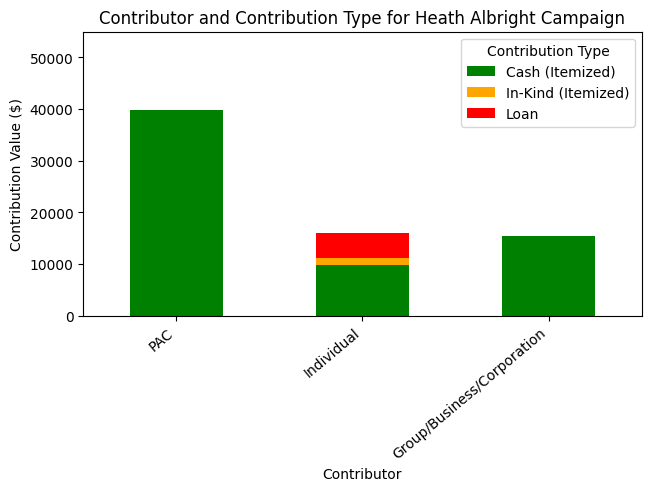

In [75]:
fig, ax = plt.subplots(constrained_layout=True)
contributionsallbright = allbrightdf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsallbright.unstack()
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation']
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
contribution_colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'Orange', 'Loan': 'Red'}
contribution_colors = [contribution_colors.get(x) for x in contributions_df.columns]
# Plotting with specific colors
bars = contributions_df.plot(kind='bar', stacked=True, color=contribution_colors, ax=ax)

ax.set_title('Contributor and Contribution Type for Heath Albright Campaign')
ax.set_xlabel('Contributor')
ax.set_ylabel('Contribution Value ($)')
# Set y-axis limits
ax.set_ylim(0, 55000)
ax.legend(loc='upper right', title='Contribution Type')
ax.set_xticks(range(len(desired_order)), desired_order, rotation=40, ha='right')
fig.savefig('./figures/heath_allbright_contributorvstype.png')

In [76]:
contributions_df

ContributionType            Cash (Itemized)  In-Kind (Itemized)    Loan
ContributorType                                                        
PAC                                 39850.0                 NaN     NaN
Individual                           9900.0             1193.48  5000.0
Group/Business/Corporation          15525.0                 NaN     NaN

In [77]:
contributions_df.stack()

ContributorType             ContributionType  
PAC                         Cash (Itemized)       39850.00
Individual                  Cash (Itemized)        9900.00
                            In-Kind (Itemized)     1193.48
                            Loan                   5000.00
Group/Business/Corporation  Cash (Itemized)       15525.00
dtype: float64

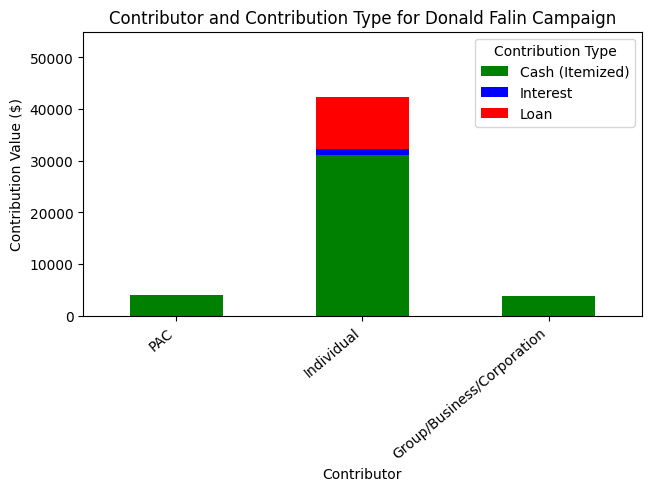

In [78]:
fig, ax= plt.subplots(constrained_layout=True)
contributionsfallin = fallindf.groupby(['ContributorType', 'ContributionType'], dropna=False)['Amount'].sum()

# Convert contributionsross to DataFrame for easy plotting
contributions_df = contributionsfallin.unstack()
desired_order = ['PAC', 'Individual', 'Group/Business/Corporation']
contributions_df = contributions_df.loc[desired_order]

# Define colors for each contribution type
contribution_colors = {'Cash (Itemized)': 'Green', 'Cash (Non-Itemized)':'lawngreen', 'In-Kind (Itemized)': 'Orange', 'Loan': 'Red', 'Interest':'blue'}
contribution_colors = [contribution_colors.get(x) for x in contributions_df.columns]
# Plotting with specific color
bars = contributions_df.plot(kind='bar', stacked=True, color=contribution_colors, ax=ax)

ax.set_title('Contributor and Contribution Type for Donald Falin Campaign')
ax.set_xlabel('Contributor')
ax.set_ylabel('Contribution Value ($)')
# Set y-axis limits
ax.set_ylim(0, 55000)
ax.legend(loc='upper right', title='Contribution Type')
ax.set_xticks(range(len(desired_order)), desired_order, rotation=40, ha='right')
fig.savefig('./figures/don_fallin_contributorvstype.png')

In [79]:
contributions_df

ContributionType            Cash (Itemized)  Interest     Loan
ContributorType                                               
PAC                                  4000.0       NaN      NaN
Individual                          31086.0    1244.0  10000.0
Group/Business/Corporation           3800.0       NaN      NaN

In [80]:
#lets look at business contributions for each now
businessallbright = allbrightdf[allbrightdf['ContributorType'] == 'Group/Business/Corporation'].sort_values(by='Amount', ascending=False)

In [81]:
businessallbright

FilingDate                       Contributor         CityState  \
3   4/2/2025 9:34:17 PM    ALABAMA IN-HOME ASSISTANCE LLC       CULLMAN, AL   
2   4/2/2025 9:34:17 PM                     WINDMILL FARM    HOLLY POND, AL   
15  4/2/2025 9:34:17 PM  HARE, WYNN, NEWELL & NEWTON, LLP    BIRMINGHAM, AL   
1   4/2/2025 9:34:17 PM                    GRADETECH, LLC  BLOUNTSVILLE, AL   
10  4/2/2025 9:34:17 PM             ALABAMA POULTRY TRUST    MONTGOMERY, AL   
54  4/2/2025 9:34:17 PM      GRIFFITH, LOWRY & MEHERG LLC       CULLMAN, AL   
4   4/2/2025 9:34:17 PM            SCHWAIGER CONSTRUCTION       CULLMAN, AL   
6   4/2/2025 9:34:17 PM                   THE BLOOM GROUP    MONTGOMERY, AL   
16  4/2/2025 9:34:17 PM                   THE JONES GROUP    MONTGOMERY, AL   
23  4/2/2025 9:34:17 PM                 COSBY COMPANY LLC         SELMA, AL   
37  4/2/2025 9:34:17 PM                   ROBERTSON FARMS       CULLMAN, AL   
64  4/2/2025 9:34:17 PM           LILCAD DIVERSIFIED, LLC    HOLLY POND, AL   
67  4/2/2025 9:34:17 PM            WAYNE BURDEN III, INC.       CULLMAN, AL   
42  4/2/2025 9:34:17 PM                  S S LAWN SERVICE    HOLLY POND, AL   

    ZipCode             ContributorType  Amount       ContributionDate  \
3     35055  Group/Business/Corporation  5000.0   3/3/2025 12:00:00 AM   
2     35083  Group/Business/Corporation  2000.0   3/3/2025 12:00:00 AM   
15    35209  Group/Business/Corporation  2000.0   3/5/2025 12:00:00 AM   
1     35019  Group/Business/Corporation  1000.0   3/3/2025 12:00:00 AM   
10    36104  Group/Business/Corporation  1000.0   3/4/2025 12:00:00 AM   
54    35055  Group/Business/Corporation  1000.0  3/18/2025 12:00:00 AM   
4     35057  Group/Business/Corporation   500.0   3/3/2025 12:00:00 AM   
6     36104  Group/Business/Corporation   500.0   3/4/2025 12:00:00 AM   
16    36103  Group/Business/Corporation   500.0   3/5/2025 12:00:00 AM   
23    36702  Group/Business/Corporation   500.0   3/5/2025 12:00:00 AM   
37    35055  Group/Business/Corporation   500.0  3/10/2025 12:00:00 AM   
64    35083  Group/Business/Corporation   500.0  3/24/2025 12:00:00 AM   
67    35058  Group/Business/Corporation   500.0  3/31/2025 12:00:00 AM   
42    35083  Group/Business/Corporation    25.0  3/13/2025 12:00:00 AM   

   ContributionType  Description            RecipientName  ContributionID  \
3   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210305   
2   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210304   
15  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210300   
1   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210302   
10  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214157   
54  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1210299   
4   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1213927   
6   Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214153   
16  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214158   
23  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214168   
37  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214192   
64  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1213922   
67  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214056   
42  Cash (Itemized)          NaN  MICHAEL HEATH ALLBRIGHT         1214082   

    RecipeintOrgID  ContSeqID  MAXROWS  RecordCount  
3            31417     918829    20000           70  
2            31417     918828    20000           70  
15           31417     918825    20000           70  
1            31417     918827    20000           70  
10           31417     918851    20000           70  
54           31417     918824    20000           70  
4            31417     918834    20000           70  
6            31417     918847    20000           70  
16           31417     918852    20000           70  
23           31417  

In [82]:
businessfallin = fallindf[fallindf['ContributorType'] == 'Group/Business/Corporation'].sort_values(by='Amount', ascending=False)

In [83]:
businessfallin

FilingDate                 Contributor       CityState  ZipCode  \
47  4/2/2025 5:09:04 PM    ALABAMA COAL COOPERATIVE     CULLMAN, AL    35056   
37  4/2/2025 5:09:04 PM    DIAMOND PLAZA PROPERTIES    VINEMONT, AL    35179   
46  4/2/2025 5:09:04 PM  CARL HASTINGS CONSTRUCTION  HANCEVILLE, AL    35077   
8   4/2/2025 5:09:04 PM      SHOP AROUND THE CORNER     CULLMAN, AL    35055   

               ContributorType  Amount       ContributionDate  \
47  Group/Business/Corporation  2500.0  3/31/2025 12:00:00 AM   
37  Group/Business/Corporation  1000.0  3/26/2025 12:00:00 AM   
46  Group/Business/Corporation   200.0  3/31/2025 12:00:00 AM   
8   Group/Business/Corporation   100.0  3/19/2025 12:00:00 AM   

   ContributionType  Description       RecipientName  ContributionID  \
47  Cash (Itemized)          NaN  DONALD GENE FALLIN         1213125   
37  Cash (Itemized)          NaN  DONALD GENE FALLIN         1211030   
46  Cash (Itemized)          NaN  DONALD GENE FALLIN         1213124   
8   Cash (Itemized)          NaN  DONALD GENE FALLIN         1210922   

    RecipeintOrgID  ContSeqID  MAXROWS  RecordCount  
47           31426     918462    20000           52  
37           31426     918451    20000           52  
46           31426     918461    20000           52  
8            31426     918418    20000           52

In [84]:
groupedbusinessallbright = businessallbright.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [85]:
groupedbusinessallbright

Contributor         CityState           FilingDate  \
0     ALABAMA IN-HOME ASSISTANCE LLC       CULLMAN, AL  4/2/2025 9:34:17 PM   
5   HARE, WYNN, NEWELL & NEWTON, LLP    BIRMINGHAM, AL  4/2/2025 9:34:17 PM   
13                     WINDMILL FARM    HOLLY POND, AL  4/2/2025 9:34:17 PM   
1              ALABAMA POULTRY TRUST    MONTGOMERY, AL  4/2/2025 9:34:17 PM   
3                     GRADETECH, LLC  BLOUNTSVILLE, AL  4/2/2025 9:34:17 PM   
4       GRIFFITH, LOWRY & MEHERG LLC       CULLMAN, AL  4/2/2025 9:34:17 PM   
2                  COSBY COMPANY LLC         SELMA, AL  4/2/2025 9:34:17 PM   
6            LILCAD DIVERSIFIED, LLC    HOLLY POND, AL  4/2/2025 9:34:17 PM   
7                    ROBERTSON FARMS       CULLMAN, AL  4/2/2025 9:34:17 PM   
9             SCHWAIGER CONSTRUCTION       CULLMAN, AL  4/2/2025 9:34:17 PM   
10                   THE BLOOM GROUP    MONTGOMERY, AL  4/2/2025 9:34:17 PM   
11                   THE JONES GROUP    MONTGOMERY, AL  4/2/2025 9:34:17 PM   
12            WAYNE BURDEN III, INC.       CULLMAN, AL  4/2/2025 9:34:17 PM   
8                   S S LAWN SERVICE    HOLLY POND, AL  4/2/2025 9:34:17 PM   

    ZipCode             ContributorType  Amount       ContributionDate  \
0     35055  Group/Business/Corporation  5000.0   3/3/2025 12:00:00 AM   
5     35209  Group/Business/Corporation  2000.0   3/5/2025 12:00:00 AM   
13    35083  Group/Business/Corporation  2000.0   3/3/2025 12:00:00 AM   
1     36104  Group/Business/Corporation  1000.0   3/4/2025 12:00:00 AM   
3     35019  Group/Business/Corporation  1000.0   3/3/2025 12:00:00 AM   
4     35055  Group/Business/Corporation  1000.0  3/18/2025 12:00:00 AM   
2     36702  Group/Business/Corporation   500.0   3/5/2025 12:00:00 AM   
6     35083  Group/Business/Corporation   500.0  3/24/2025 12:00:00 AM   
7     35055  Group/Business/Corporation   500.0  3/10/2025 12:00:00 AM   
9     35057  Group/Business/Corporation   500.0   3/3/2025 12:00:00 AM   
10    36104  Group/Business/Corporation   500.0   3/4/2025 12:00:00 AM   
11    36103  Group/Business/Corporation   500.0   3/5/2025 12:00:00 AM   
12    35058  Group/Business/Corporation   500.0  3/31/2025 12:00:00 AM   
8     35083  Group/Business/Corporation    25.0  3/13/2025 12:00:00 AM   

   ContributionType  Description            RecipientName  ContributionID  \
0   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1210305   
5   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1210300   
13  Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1210304   
1   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214157   
3   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1210302   
4   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1210299   
2   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214168   
6   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1213922   
7   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214192   
9   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1213927   
10  Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214153   
11  Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214158   
12  Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214056   
8   Cash (Itemized)          0.0  MICHAEL HEATH ALLBRIGHT         1214082   

    RecipeintOrgID  ContSeqID  MAXROWS  RecordCount  
0            31417     918829    20000           70  
5            31417     918825    20000           70  
13           31417     918828    20000           70  
1            31417     918851    20000           70  
3            31417     918827    20000           70  
4            31417     918824    20000           70  
2            31417     918860    20000           70  
6            31417     918833    20000           70  
7            31417     918877    20000           70  
9            31417     918834   

In [86]:
groupedbusinessfallin = businessfallin.groupby(['Contributor', 'CityState']).sum().reset_index().sort_values(by='Amount', ascending=False)

In [87]:
groupedbusinessfallin

Contributor       CityState           FilingDate  ZipCode  \
0    ALABAMA COAL COOPERATIVE     CULLMAN, AL  4/2/2025 5:09:04 PM    35056   
2    DIAMOND PLAZA PROPERTIES    VINEMONT, AL  4/2/2025 5:09:04 PM    35179   
1  CARL HASTINGS CONSTRUCTION  HANCEVILLE, AL  4/2/2025 5:09:04 PM    35077   
3      SHOP AROUND THE CORNER     CULLMAN, AL  4/2/2025 5:09:04 PM    35055   

              ContributorType  Amount       ContributionDate ContributionType  \
0  Group/Business/Corporation  2500.0  3/31/2025 12:00:00 AM  Cash (Itemized)   
2  Group/Business/Corporation  1000.0  3/26/2025 12:00:00 AM  Cash (Itemized)   
1  Group/Business/Corporation   200.0  3/31/2025 12:00:00 AM  Cash (Itemized)   
3  Group/Business/Corporation   100.0  3/19/2025 12:00:00 AM  Cash (Itemized)   

   Description       RecipientName  ContributionID  RecipeintOrgID  ContSeqID  \
0          0.0  DONALD GENE FALLIN         1213125           31426     918462   
2          0.0  DONALD GENE FALLIN         1211030           31426     918451   
1          0.0  DONALD GENE FALLIN         1213124           31426     918461   
3          0.0  DONALD GENE FALLIN         1210922           31426     918418   

   MAXROWS  RecordCount  
0    20000           52  
2    20000           52  
1    20000           52  
3    20000           52

In [88]:
locationsfallin= list(groupedbusinessfallin['CityState']) #where the businesses originate
businessnamefallin = list(groupedbusinessfallin['Contributor']) #the location of the contributor business
locationsallbright= list(groupedbusinessallbright['CityState']) #where the businesses originate
businessnameallbright = list(groupedbusinessallbright['Contributor']) #the location of the contributor business

In [89]:
locationsallbright

['CULLMAN, AL',
 'BIRMINGHAM, AL',
 'HOLLY POND, AL',
 'MONTGOMERY, AL',
 'BLOUNTSVILLE, AL',
 'CULLMAN, AL',
 'SELMA, AL',
 'HOLLY POND, AL',
 'CULLMAN, AL',
 'CULLMAN, AL',
 'MONTGOMERY, AL',
 'MONTGOMERY, AL',
 'CULLMAN, AL',
 'HOLLY POND, AL']

In [90]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93'}

In [91]:
for loc in locationsfallin:
    if loc not in colors:
        # Assign the next color and loop back if needed
        colors[loc] = color_palette[color_index % len(color_palette)]
        color_index += 1

for loc in locationsallbright:
    if loc not in colors:
        # Assign the next color and loop back if needed
        colors[loc] = color_palette[color_index % len(color_palette)]
        color_index += 1

In [92]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93',
 'CULLMAN, AL': '#457b9d',
 'VINEMONT, AL': '#ff6b6b',
 'HANCEVILLE, AL': '#a8dadc',
 'HOLLY POND, AL': '#4ecdc4',
 'BLOUNTSVILLE, AL': '#ffb627',
 'SELMA, AL': '#1d3557'}

In [93]:
legend_elements = [Patch(facecolor=color, edgecolor='black', label=location) for location, color in colors.items() if location in locationsfallin]

In [94]:
legend_elements

In [95]:
fallinbarcolors = [colors.get(i) for i in locationsfallin]

In [96]:
fallinbarcolors

['#457b9d', '#ff6b6b', '#a8dadc', '#457b9d']

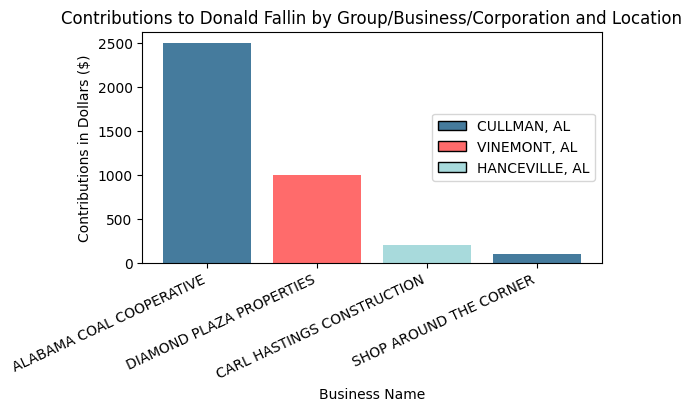

In [97]:
#plot it all
fig, ax = plt.subplots(figsize=(6, 4), constrained_layout=True)
ax.bar(range(len(groupedbusinessfallin)), groupedbusinessfallin['Amount'], color=fallinbarcolors)
ax.set_ylabel('Contributions in Dollars ($)')
ax.set_xlabel('Business Name')
ax.set_title('Contributions to Donald Fallin by Group/Business/Corporation and Location')
ax.set_xticks(range(len(businessnamefallin)), businessnamefallin, rotation=25, ha='right')
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.5))
fig.savefig('./figures/fallin_business.png')

In [98]:
legend_elements = [Patch(facecolor=color, edgecolor='black', label=location) for location, color in colors.items() if location in locationsallbright]

In [99]:
colors

{'MONTGOMERY, AL': '#264653',
 'RAINSVILLE, AL': '#2a9d8f',
 'BESSEMER, AL': '#e76f51',
 'MOBILE, AL': '#f4a261',
 'BIRMINGHAM, AL': '#e9c46a',
 'PELHAM, AL': '#6a4c93',
 'CULLMAN, AL': '#457b9d',
 'VINEMONT, AL': '#ff6b6b',
 'HANCEVILLE, AL': '#a8dadc',
 'HOLLY POND, AL': '#4ecdc4',
 'BLOUNTSVILLE, AL': '#ffb627',
 'SELMA, AL': '#1d3557'}

In [100]:
legend_elements

In [101]:
allbrightbarcolors = [colors.get(i) for i in locationsallbright]

In [102]:
allbrightbarcolors

['#457b9d',
 '#e9c46a',
 '#4ecdc4',
 '#264653',
 '#ffb627',
 '#457b9d',
 '#1d3557',
 '#4ecdc4',
 '#457b9d',
 '#457b9d',
 '#264653',
 '#264653',
 '#457b9d',
 '#4ecdc4']

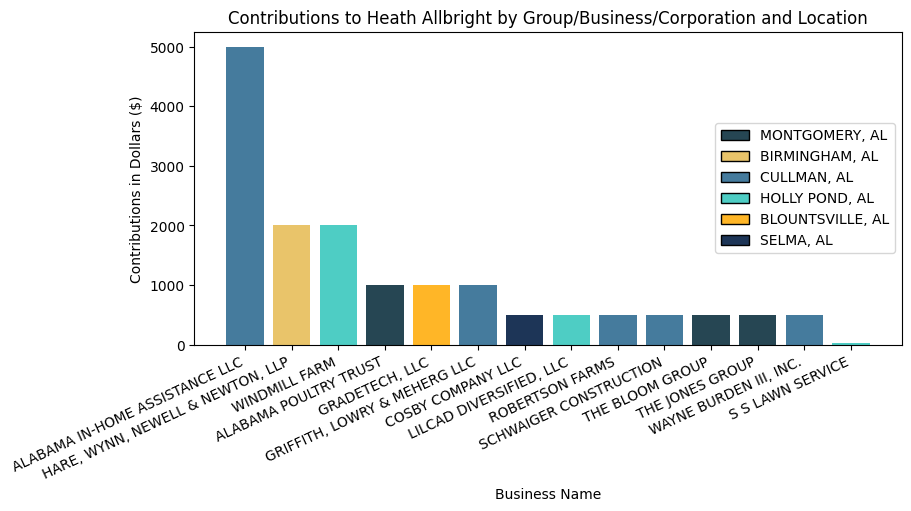

In [103]:
fig, ax = plt.subplots(figsize=(9,5), constrained_layout=True)
ax.bar(range(len(groupedbusinessallbright)), groupedbusinessallbright['Amount'], color=allbrightbarcolors)
ax.set_ylabel('Contributions in Dollars ($)')
ax.set_xlabel('Business Name')
ax.set_title('Contributions to Heath Allbright by Group/Business/Corporation and Location')
ax.set_xticks(range(len(businessnameallbright)), businessnameallbright, rotation=25, ha='right')
ax.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1, 0.5))
fig.savefig('./figures/allbright_business.png')